In [37]:
import pandas as pd 
df=pd.read_csv("CNBSRandomm.csv");
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df.head(5)
tc=500;
tc=tc+1
print(df.head())

                                                code  tag
0  35 105 110 99 108 117 100 101 60 98 105 116 11...    0
1  35 105 110 99 108 117 100 101 60 98 105 116 11...    0
2  35 105 110 99 108 117 100 101 60 98 105 116 11...    0
3  35 105 110 99 108 117 100 101 60 98 105 116 11...    0
4  35 105 110 99 108 117 100 101 60 98 105 116 11...    0


In [39]:
trainX,train_Y=df['code'],df['tag']

In [40]:
tmp=[]
for i in trainX:
    k=i.split()
    
        
    a=np.array(k)
    a=a.astype('float32')
    
    a=a.reshape(tc,1)
    tmp.append(a)
train_X=np.array(tmp)
train_X.shape
type(train_X[1][1][0])



numpy.float32

In [41]:


train_X.shape

(264, 501, 1)

In [42]:
train_X=train_X/155 
train_X

array([[[0.22580644],
        [0.67741936],
        [0.7096774 ],
        ...,
        [0.09032258],
        [0.7096774 ],
        [0.36129034]],

       [[0.22580644],
        [0.67741936],
        [0.7096774 ],
        ...,
        [0.8       ],
        [0.12903225],
        [0.11612903]],

       [[0.22580644],
        [0.67741936],
        [0.7096774 ],
        ...,
        [0.07741936],
        [0.02580645],
        [0.38064516]],

       ...,

       [[0.22580644],
        [0.67741936],
        [0.7096774 ],
        ...,
        [0.7290323 ],
        [0.6516129 ],
        [0.22580644]],

       [[0.22580644],
        [0.67741936],
        [0.7096774 ],
        ...,
        [0.8967742 ],
        [0.43225807],
        [0.78064513]],

       [[0.22580644],
        [0.67741936],
        [0.7096774 ],
        ...,
        [0.61935484],
        [0.7612903 ],
        [0.42580646]]], dtype=float32)

In [43]:
train_X = train_X.reshape(-1, tc,1, 1)
train_X.shape

(264, 501, 1, 1)

In [44]:
from keras.utils import to_categorical

In [45]:
train_Y_one_hot = to_categorical(train_Y)
#test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[2])
print('After conversion to one-hot:', train_Y_one_hot[2])


Original label: 0
After conversion to one-hot: [1. 0.]


In [46]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.1, random_state=13)

In [47]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((237, 501, 1, 1), (27, 501, 1, 1), (237, 2), (27, 2))

In [48]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [49]:
batch_size = 64
epochs = 20
num_classes = 2

In [50]:
binary_model = Sequential()
binary_model.add(Conv2D(16, kernel_size=(4, 1),activation='linear',input_shape=(tc,1,1),padding='same'))
binary_model.add(LeakyReLU(alpha=0.1))
binary_model.add(MaxPooling2D((2, 1),padding='same'))
binary_model.add(Dropout(0.2))
binary_model.add(Conv2D(32, (4, 1), activation='linear',padding='same'))
binary_model.add(LeakyReLU(alpha=0.1))
binary_model.add(MaxPooling2D(pool_size=(2, 1),padding='same'))
binary_model.add(Dropout(0.2))
binary_model.add(Flatten())
binary_model.add(Dense(128, activation='linear'))
binary_model.add(LeakyReLU(alpha=0.1))                  
binary_model.add(Dense(num_classes, activation='softmax'))

In [51]:
binary_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [52]:
binary_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 501, 1, 16)        80        
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 501, 1, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 251, 1, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 251, 1, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 251, 1, 32)        2080      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 251, 1, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 126, 1, 32)        0         
__________

In [53]:
binary_train = binary_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 237 samples, validate on 27 samples
Epoch 1/20
237/237 [==============================] - 1s 3ms/step - loss: 0.8505 - acc: 0.4810 - val_loss: 0.6878 - val_acc: 0.5556
Epoch 2/20
237/237 [==============================] - 0s 1ms/step - loss: 0.7601 - acc: 0.4515 - val_loss: 0.6887 - val_acc: 0.5556
Epoch 3/20
237/237 [==============================] - 0s 1ms/step - loss: 0.7135 - acc: 0.5232 - val_loss: 0.6993 - val_acc: 0.4444
Epoch 4/20
237/237 [==============================] - 0s 1ms/step - loss: 0.7205 - acc: 0.5485 - val_loss: 0.7105 - val_acc: 0.4444
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6966 - acc: 0.5485 - val_loss: 0.7183 - val_acc: 0.4444
Epoch 6/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6930 - acc: 0.5485 - val_loss: 0.7179 - val_acc: 0.4444
Epoch 7/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6994 - acc: 0.5443 - val_loss: 0.7078 - val_acc: 0.4444
Epoch 8/20
237/237 [===========

In [54]:
test_eval =binary_model.evaluate(train_X, train_label, verbose=0)

In [55]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5334178910979742
Test accuracy: 0.890295358649789


In [56]:
from sklearn.metrics import classification_report
predicted_classes=binary_model.predict(valid_X)
print(predicted_classes)

[[0.5328235  0.4671765 ]
 [0.52321    0.47679   ]
 [0.56464773 0.43535227]
 [0.60225904 0.39774096]
 [0.5527639  0.44723612]
 [0.56971854 0.43028137]
 [0.5856899  0.41431013]
 [0.4917581  0.50824183]
 [0.4992258  0.5007742 ]
 [0.5582332  0.44176686]
 [0.45394087 0.5460592 ]
 [0.44409895 0.55590105]
 [0.5559463  0.4440537 ]
 [0.52223355 0.47776642]
 [0.63880616 0.36119384]
 [0.5741342  0.42586586]
 [0.45464653 0.54535353]
 [0.3711997  0.6288003 ]
 [0.6301791  0.3698209 ]
 [0.5055015  0.4944985 ]
 [0.48687682 0.5131232 ]
 [0.66527855 0.33472145]
 [0.623598   0.37640205]
 [0.50319797 0.49680206]
 [0.32894546 0.6710545 ]
 [0.48091406 0.519086  ]
 [0.5235678  0.47643223]]


In [57]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [58]:
predicted_classes


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0], dtype=int64)

In [59]:
actual= np.argmax(np.round(valid_label),axis=1)

In [60]:
actual

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1], dtype=int64)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(predicted_classes,actual))

             precision    recall  f1-score   support

          0       0.92      0.61      0.73        18
          1       0.53      0.89      0.67         9

avg / total       0.79      0.70      0.71        27



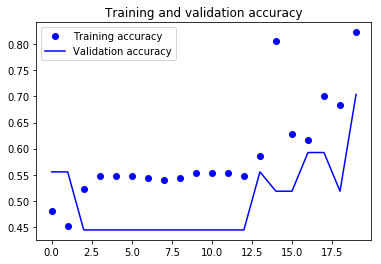

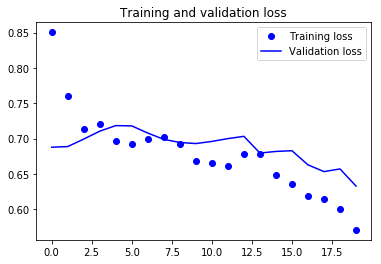

In [62]:
accuracy = binary_train.history['acc']
val_accuracy = binary_train.history['val_acc']
loss = binary_train.history['loss']
val_loss = binary_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [63]:
import random 
def cleanData(c):
    code=c
    df1 = pd.DataFrame({'A':[code]})
            
    df1 = df1.replace('\n',' ', regex=True)
    df1 = df1.replace('\t',' ', regex=True)
    df1 = df1.replace('\r',' ', regex=True)
    df1 = df1.replace(',',' ', regex=True)
    c=0
    asciiCode=""
    for i in df1['A']:
                                        c=0
                                        for x in i:
                                            if(c==(tc-1)):
                                                break
                                            try:
                                                if(x==' '):
                                                    continue
                                                asciiCode=asciiCode+str(ord(x))+" "
                                                #print(ord(x),end=' ')
                                            except:
                                                asciiCode=asciiCode+str(ord('?'))+" "
                                                #print(ord('?'),end=' ')
                                            c=c+1
                                        while(c<=(tc-1)):
                                            asciiCode=asciiCode+str(random.randint(1,140))+" "
                                            #print("0",end=' ')
                                            c=c+1
                                   
    return asciiCode

    
    

In [64]:
code="""
#include<bits/stdc++.h>
int main()
{
int dp[6000]
scanf(n);
printf(n)
for(i=0;i<=1000;i++)
cin>>a[i];

}
}

"""

In [65]:
#print(getPrediction(makeCNNReady(code)))


In [66]:
def makeCNNReady(c):
    tmp=[]
    tmp=c.split()
    aa=np.array(tmp)
    aa=aa.astype('float32')
    
    aa=aa.reshape(tc,1)
    aa=aa.reshape(-1,tc,1,1)
    aa=aa/155
    return aa
        
        

In [67]:
tt=makeCNNReady(cleanData(code))


In [68]:
tt.shape

(1, 501, 1, 1)

In [69]:
tt=tt/155

In [70]:
def getPrediction(c):
    pred=binary_model.predict(makeCNNReady(cleanData(c)))
    print(pred)
    #cc=np.argmax(np.round(pred),axis=1)
    if pred[0][1]>=pred[0][0]:
        return "yes"
    else:
        return "no"
    

In [71]:
getPrediction(code)

[[0.49433962 0.50566036]]


'yes'

In [72]:
print(code)


#include<bits/stdc++.h>
int main()
{
int dp[6000]
scanf(n);
printf(n)
for(i=0;i<=1000;i++)
cin>>a[i];

}
}




In [73]:
#x=makeCNNReady(cleanData(code))
#print(x)
getPrediction(code)

[[0.7381767  0.26182333]]


'no'